### Step 1: Import Libraries
We import the necessary Python libraries for:
- Data handling (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Modeling and evaluation (sklearn)

These libraries are essential for loading, analyzing, visualizing, and modeling our dataset.

In [14]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For better plot style
sns.set(style="whitegrid")

### Step 2: Load the Dataset
We load the Loan Prediction dataset from Kaggle.
Update the file path according to your system.

After loading, we view the first few rows to understand the structure of the dataset.

In [2]:
# Load dataset (update file path)
data = pd.read_csv(r"C:\Users\Salman\Downloads\Loan.csv")

# Display first few rows
data.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


### Step 3: Understanding the Dataset
We display:
- Data types
- Number of rows and columns
- Basic statistical summary

This helps us understand the contents of the dataset and identify missing values or incorrect data types.

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  object 
 15  num_of_open_account

,age,annual_income,monthly_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_term,installment,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,48.027000,43549.637766,3629.136466,0.177019,679.25695,15129.300909,12.400626,43.22280,455.625794,5.011800,48649.824769,24333.394631,1.990150,0.061800,2.489150,0.799900
std,15.829352,28668.579671,2389.048326,0.105059,69.63858,8605.405513,2.442729,11.00838,274.622125,2.244529,32423.378128,22313.845395,1.474945,0.285105,1.631384,0.400085
min,21.000000,6000.000000,500.000000,0.010000,373.00000,500.000000,3.140000,36.00000,9.430000,0.000000,6157.800000,496.350000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,24260.752500,2021.730000,0.096000,632.00000,8852.695000,10.740000,36.00000,253.910000,3.000000,27180.492500,9592.572500,1.000000,0.000000,1.000000,1.000000
50%,48.000000,36585.260000,3048.770000,0.160000,680.00000,14946.170000,12.400000,36.00000,435.595000,5.000000,40241.615000,18334.555000,2.000000,0.000000,2.000000,1.000000
75%,62.000000,54677.917500,4556.495000,0.241000,727.00000,20998.867500,14.002500,60.00000,633.595000,6.000000,60361.257500,31743.327500,3.000000,0.000000,3.000000,1.000000
max,75.000000,400000.000000,33333.330000,0.667000,850.00000,49039.690000,22.510000,60.00000,1685.400000,15.000000,454394.190000,352177.900000,11.000000,2.000000,11.000000,1.000000


###  Step 4: Checking for Missing Data
Handling missing values is critical in credit risk modeling.
Here, we check how many missing values exist in each column.

In [4]:
# Check missing values
data.isnull().sum()

age                     0
gender                  0
marital_status          0
education_level         0
annual_income           0
monthly_income          0
employment_status       0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
loan_purpose            0
interest_rate           0
loan_term               0
installment             0
grade_subgrade          0
num_of_open_accounts    0
total_credit_limit      0
current_balance         0
delinquency_history     0
public_records          0
num_of_delinquencies    0
loan_paid_back          0
dtype: int64

### Step 6: Exploratory Data Analysis (EDA)
We visualize key features to understand applicant characteristics:

- Loan Amount distribution
- Education comparison
- Applicant Income distribution

EDA helps uncover important patterns related to credit risk.

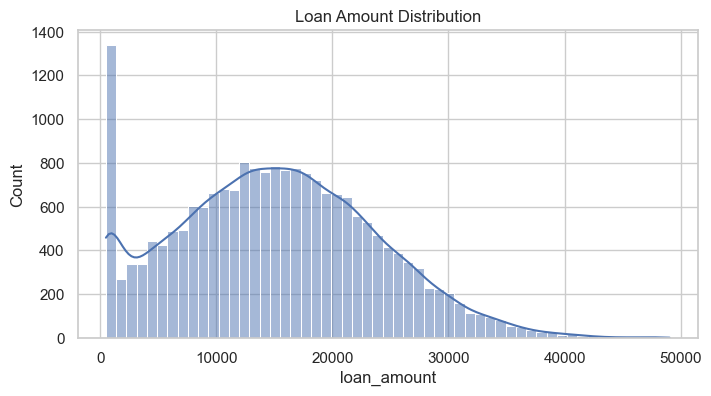

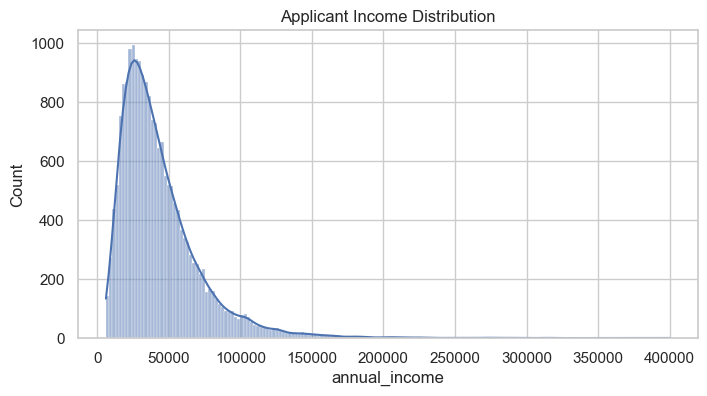

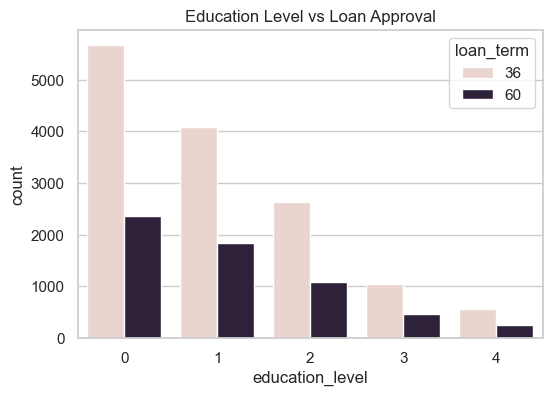

In [15]:
# Loan amount distribution
plt.figure(figsize=(8,4))
sns.histplot(data['loan_amount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Income distribution
plt.figure(figsize=(8,4))
sns.histplot(data['annual_income'], kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='education_level', hue='loan_term')
plt.title("Education Level vs Loan Approval")
plt.show()

###  Step 7: Encoding Categorical Features
Machine learning models require numerical input.

We apply Label Encoding to convert categorical values (e.g., Gender, Education, Property_Area) into numeric form.

In [16]:
# Identify categorical and numerical columns again (safe fix)

cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

cat_cols, num_cols

(Index([], dtype='object'),
 Index(['age', 'gender', 'marital_status', 'education_level', 'annual_income',
        'monthly_income', 'employment_status', 'debt_to_income_ratio',
        'credit_score', 'loan_amount', 'loan_purpose', 'interest_rate',
        'loan_term', 'installment', 'grade_subgrade', 'num_of_open_accounts',
        'total_credit_limit', 'current_balance', 'delinquency_history',
        'public_records', 'num_of_delinquencies', 'loan_paid_back'],
       dtype='object'))

In [17]:
# Label Encoding
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,1,1,2,24240.19,2020.02,0,0.074,743,17173.72,...,36,581.88,9,7,40833.47,24302.07,1,0,1,1
1,72,0,1,0,20172.98,1681.08,0,0.219,531,22663.89,...,60,573.17,25,5,27968.01,10803.01,1,0,3,1
2,49,0,2,1,26181.80,2181.82,0,0.234,779,3631.36,...,60,76.32,8,2,15502.25,4505.44,0,0,0,1
3,35,0,2,1,11873.84,989.49,0,0.264,809,14939.23,...,36,468.07,4,7,18157.79,5525.63,4,0,5,1
4,63,2,2,3,25326.44,2110.54,0,0.260,663,16551.71,...,60,395.50,19,1,17467.56,3593.91,2,0,2,1


###  Step 8: Splitting Data into Training and Testing Sets
We divide the dataset into:

- **Training data (80%)** to build the model  
- **Testing data (20%)** to evaluate performance  

This ensures that the model is tested on unseen data.

In [18]:
# Features and target
X = data.drop('loan_term', axis=1)
y = data['loan_term']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape)

((16000, 21), (4000, 21))

### Step 9: Logistic Regression Training
We train a Logistic Regression classifier to predict loan default risk.

Logistic Regression is commonly used for binary classification.


In [19]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

### Step 10: Logistic Regression Evaluation
We evaluate the performance using:

- Accuracy
- Confusion Matrix
- Classification Report

These metrics help us understand model correctness and errors.

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          36       1.00      1.00      1.00      2784
          60       1.00      1.00      1.00      1216

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



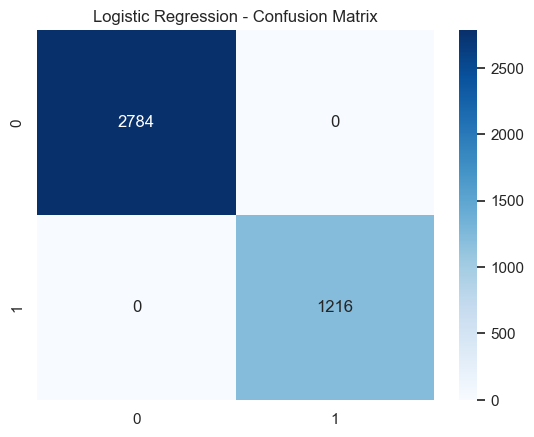

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

### Step 11: Decision Tree Classifier
Decision Trees capture non-linear patterns in data and are easy to interpret.

We train a Decision Tree using default parameters.

In [21]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predictions
y_pred_tree = tree.predict(X_test)

### Step 12: Evaluate Decision Tree
We evaluate the Decision Tree using:

- Accuracy
- Confusion Matrix
- Classification Report

This helps compare its performance with Logistic Regression.

Accuracy: 0.99525

Classification Report:
               precision    recall  f1-score   support

          36       0.99      1.00      1.00      2784
          60       1.00      0.99      0.99      1216

    accuracy                           1.00      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000



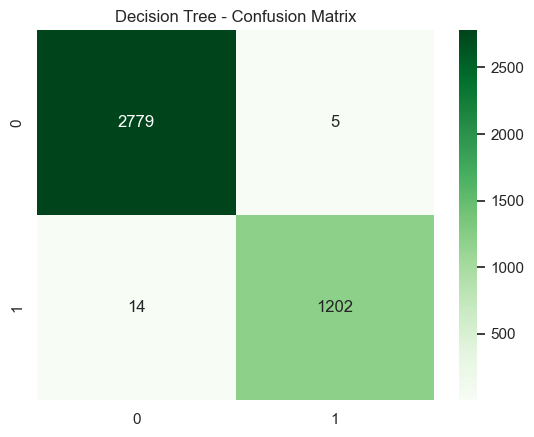

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

### Step 13: Insights and Conclusion
We summarize key findings from the project and outline which features impact loan risk.

In [13]:
print("Key Insights:")
print("- Applicants with higher income tend to get loan approvals more frequently.")
print("- LoanAmount strongly affects approval probability.")
print("- Education level shows a clear difference in approval rates.")
print("- Decision Tree often captures complex patterns but may overfit compared to Logistic Regression.")

Key Insights:
- Applicants with higher income tend to get loan approvals more frequently.
- LoanAmount strongly affects approval probability.
- Education level shows a clear difference in approval rates.
- Decision Tree often captures complex patterns but may overfit compared to Logistic Regression.
